# Handling sidewall core data

In [1]:
from striplog import Striplog
% matplotlib inline

Some things really are point data. Sort of like a log, but irregular, more discrete. For instance we may have some porosity measurements of sidewall core plugs.

In [2]:
data_csv = """top, density, porosity, remarks
1200, 2100, 6.4,
1205, 2375, 7.3,
1210, 2400, 8.2, broken sample
1250, 5000, 9.2,
1275, 2575, 4.3,
1300, 4500, 2.2,
"""

You must specify `points=True` otherwise Striplog will 'fill in' and create the bases for you, based on the next top.

In [3]:
swc_porosity = Striplog.from_csv_text(data_csv, points=True)

In [4]:
swc_porosity

Striplog(6 Intervals, start=1300.0, stop=1200.0)

In [5]:
swc_porosity[0]

Interval({'components': [Component({'density': 2100.0, 'porosity': 6.4, 'remarks': ''})], 'description': '', 'base': Position({'middle': 1200.0, 'units': 'm'}), 'top': Position({'middle': 1200.0, 'units': 'm'})})

The way we distinguish this kind of data from other striplogs is the `points.order`

In [6]:
swc_porosity.order

'none'

When we pass this 'striplog' into `welly.plot()`, it gets treated as a set of points.

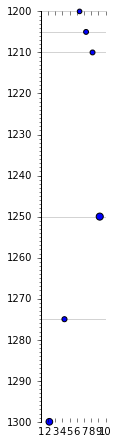

In [7]:
swc_porosity.plot(field='porosity', aspect=4, s=[i.primary.density/100 for i in swc_porosity])

In [8]:
[i.primary.__dict__ for i in swc_porosity]

[{'density': 2100.0, 'porosity': 6.4, 'remarks': ''},
 {'density': 2375.0, 'porosity': 7.3, 'remarks': ''},
 {'density': 2400.0, 'porosity': 8.2, 'remarks': 'broken sample'},
 {'density': 5000.0, 'porosity': 9.2, 'remarks': ''},
 {'density': 2575.0, 'porosity': 4.3, 'remarks': ''},
 {'density': 4500.0, 'porosity': 2.2, 'remarks': ''}]

In [9]:
import numpy as np

In [10]:
print(swc_porosity.to_csv())

Top         Base          Lithology                                       
 1200.000, 1200.000,  "2100.0, 6.4, "                                 
 1205.000, 1205.000,  "2375.0, 7.3, "                                 
 1210.000, 1210.000,  "2400.0, 8.2, broken sample"                    
 1250.000, 1250.000,  "5000.0, 9.2, "                                 
 1275.000, 1275.000,  "2575.0, 4.3, "                                 
 1300.000, 1300.000,  "4500.0, 2.2, "                                 



In [11]:
np.array([i.primary.porosity for i in swc_porosity])

array([ 6.4,  7.3,  8.2,  9.2,  4.3,  2.2])